In [4]:
import numpy as np
import matplotlib.pyplot as plt

from DataFormat    import Detector
from plot_spectrum import plot_energy_spectrum, plot_time_spectrum
from calib_fit     import fit_peak, gaussian, build_parameter_string, save_parameters

import glob
import os



In [162]:
SOURCE_LIST = ("60Co", "137Cs", "22Na", "AmBe")
E_FILTER    = ([10, 5, 5], [500, 500, 500])

E_CS   = 661.7  # keV
E_NA_1 = 511.0  # keV
E_NA_2 = 1274.5 # keV
E_CO_1 = 1173.2 # keV
E_CO_2 = 1332.5 # keV

E_CO_SUM_12 = E_CO_1 + E_CO_2
E_CO_SUM_11 = E_CO_1 + E_CO_1
E_CO_SUM_22 = E_CO_2 + E_CO_2

In [163]:
LaBr3_A = Detector(name="labr_a", sources=SOURCE_LIST)

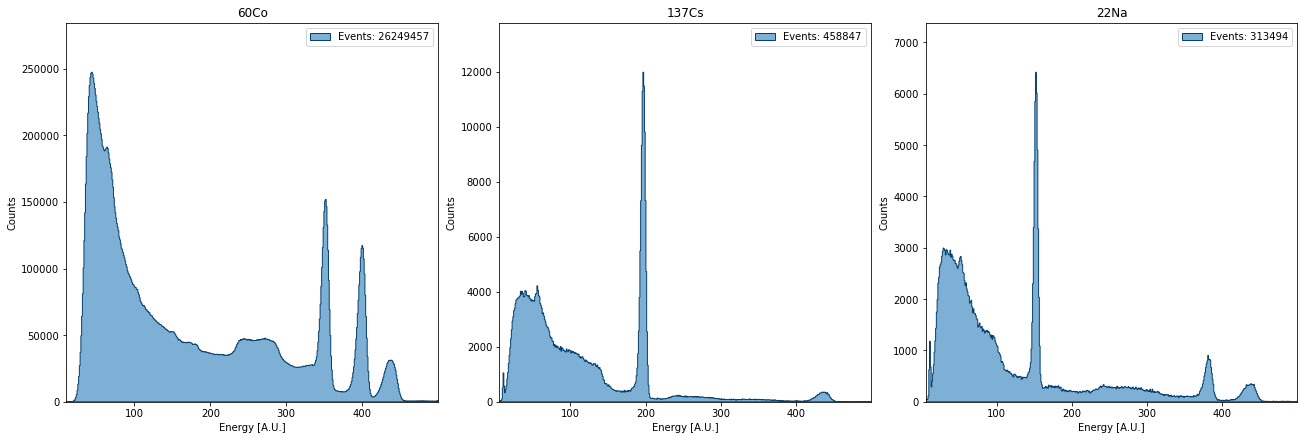

In [7]:
fig = plt.figure(figsize=(18, 6), constrained_layout=True)

for i, source in enumerate(SOURCE_LIST):
    x, y = LaBr3_A.get_energy_histogram(source)
    e_filter = (x > E_FILTER[0][i]) & (x < E_FILTER[1][i])
    ax = plot_energy_spectrum(
            x             = x, 
            y             = y, 
            energy_filter = e_filter,
            bins          = x[e_filter], 
            fig           = fig, 
            title         = f"{source}",
            xlabel        = "Energy [A.U.]",
            nrows         = 1, 
            ncols         = 3, 
            idx           = 1+i,
            label         = f"Events: {np.sum(y[e_filter]):.0f}"
        )
    ax.legend()
    
plt.show()

## Cesio

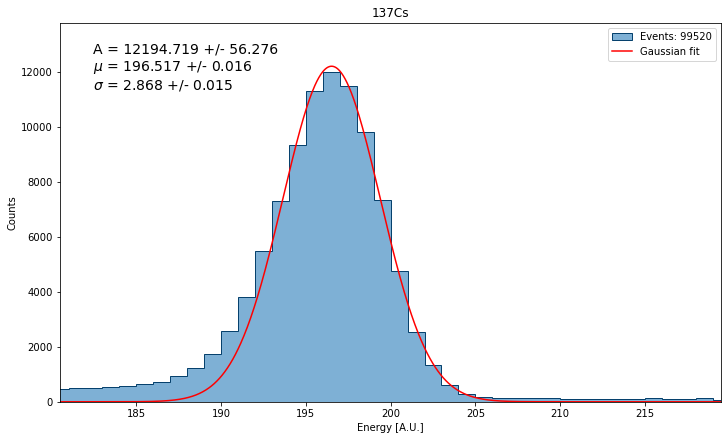

In [14]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[1]

x, y  = LaBr3_A.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

e_plot = (x > 180) & (x < 220)
e_bins = (edges > 180 - binwidth) & (edges < 220 + binwidth)

e_gaus  = (x > 193) & (x < 203)

xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)


par, err = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 200, 5), e_fit=e_gaus)

ax.plot(xgrid, gaussian(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par, err)

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.legend()

plt.show()


save_parameters(par, err, "labr_a_137Cs_662keV")


## Sodio

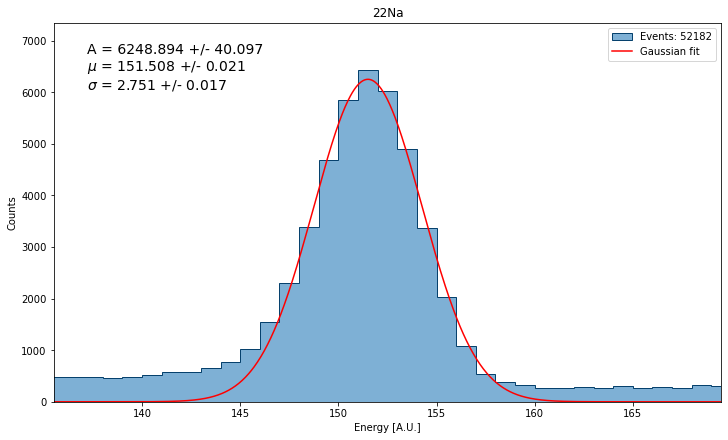

In [15]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[2]

x, y  = LaBr3_A.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 135
right = 170
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)

e_fit  = (x > 148) & (x < 160)

xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)


par, err = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 153, 5), e_fit=e_fit)

ax.plot(xgrid, gaussian(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par, err)

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.legend()

plt.show()

save_parameters(par, err, "labr_a_22Na_511keV")

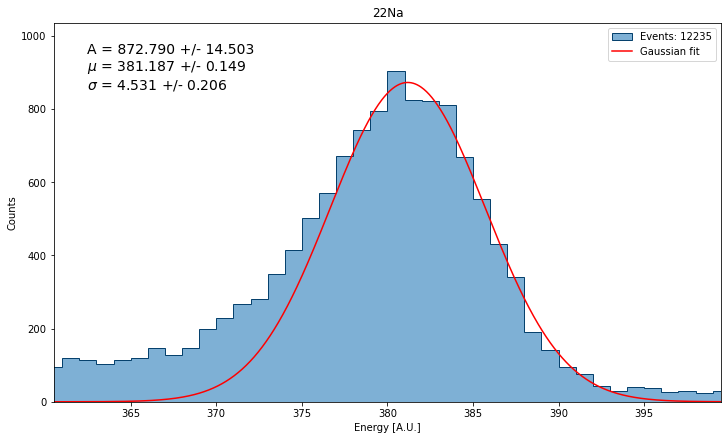

In [19]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[2]

x, y  = LaBr3_A.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 360
right = 400
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)

e_fit  = (x > 378) & (x < 387)

xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)


par, err = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 360, 5), e_fit=e_fit)

ax.plot(xgrid, gaussian(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par, err)

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.legend()

plt.show()

save_parameters(par, err, "labr_a_22Na_1274keV")

## Cobalto

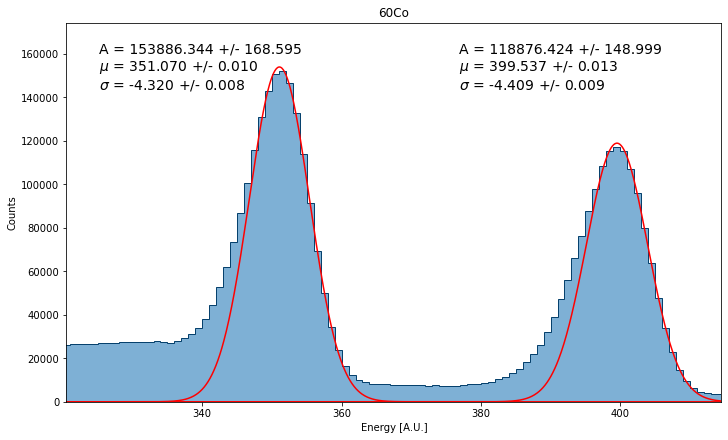

In [111]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[0]

x, y  = LaBr3_A.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 320
right = 415
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)

e_fit_1  = (x > 348) & (x < 360)
e_fit_2  = (x > 397) & (x < 410)

xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)

par_1, err_1 = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 350, 5), e_fit=e_fit_1)
par_2, err_2 = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 400, 5), e_fit=e_fit_2)

ax.plot(xgrid, gaussian(xgrid, *par_1), "r-", label="Gaussian fit")
ax.plot(xgrid, gaussian(xgrid, *par_2), "r-", label="Gaussian fit")

par_string_1 = build_parameter_string(par_1, err_1)
par_string_2 = build_parameter_string(par_2, err_2)

ax.text(0.05, 0.95, par_string_1, transform=ax.transAxes, fontsize=14, verticalalignment='top')
ax.text(0.60, 0.95, par_string_2, transform=ax.transAxes, fontsize=14, verticalalignment='top')

# ax.legend()

plt.show()

# save_parameters(par_1, err_1, "labr_a_60Co_1173keV")
# save_parameters(par_2, err_2, "labr_a_60Co_1332keV")

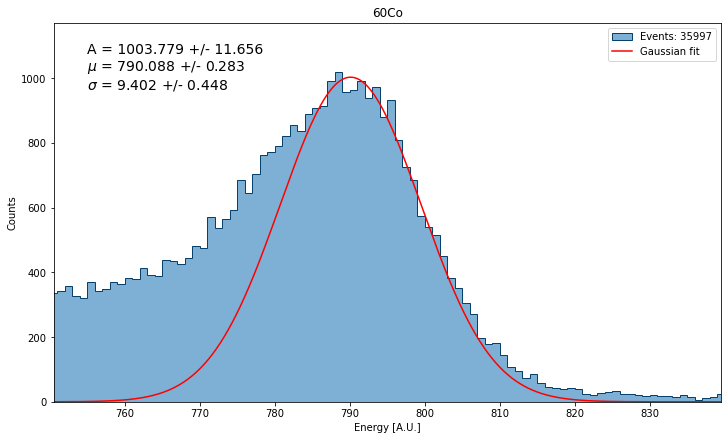

In [31]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[0]

x, y  = LaBr3_A.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 750
right = 840
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)

e_fit_1  = (x > 785) & (x < 800)


xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)

par_1, err_1 = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 790, 5), e_fit=e_fit_1)


ax.plot(xgrid, gaussian(xgrid, *par_1), "r-", label="Gaussian fit")


par_string_1 = build_parameter_string(par_1, err_1)


ax.text(0.05, 0.95, par_string_1, transform=ax.transAxes, fontsize=14, verticalalignment='top')


ax.legend()

plt.show()

save_parameters(par_1, err_1, "labr_a_60Co_2665keV")

In [98]:
parameters_path = "./calib-parameters/"
name = "labr_a"
calibration = np.loadtxt(f"{parameters_path}{name}_linear_parameters.txt")
m = calibration[0]
q = calibration[1]

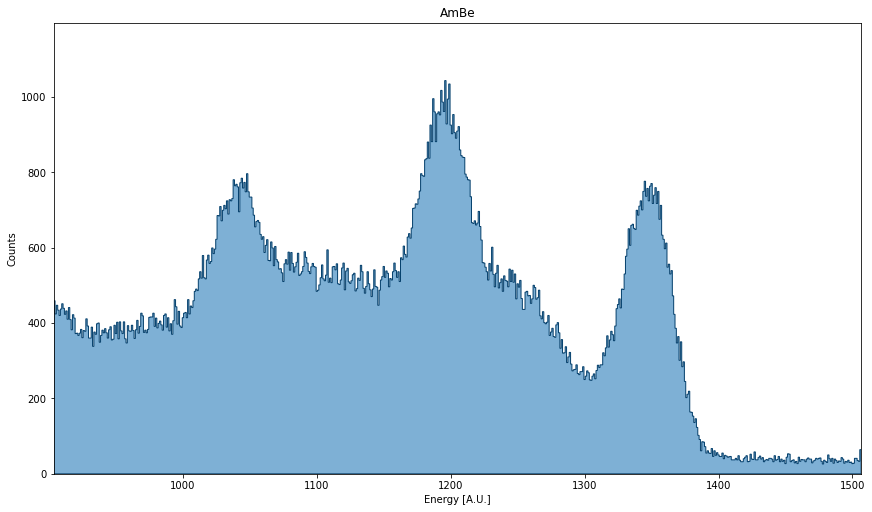

In [164]:
# plot the AmBe spectrum
fig, ax = plt.subplots(figsize=(12,7), constrained_layout=True)

x, y = LaBr3_A.get_energy_histogram("AmBe")
x_cal = (x - q) / m

e_filter = (x_cal > 3000) & (x_cal < 5000)

ax = plot_energy_spectrum(x=x, y=y, energy_filter=e_filter, bins=x[e_filter], fig=fig, title="AmBe", xlabel="Energy [A.U.]", label=f"Events: {np.sum(y[e_filter]):.0f}", ax=ax)


plt.show()

In [138]:
E_BE = 4438.0 #keV
E_BE_1 = E_BE - 511
E_BE_2 = E_BE - 511*2

In [140]:
print(f"BE: {E_BE} keV")
print(f"BE - 511 keV: {E_BE_1} keV")
print(f"BE - 2*511 keV: {E_BE_2} keV")

BE: 4438.0 keV
BE - 511 keV: 3927.0 keV
BE - 2*511 keV: 3416.0 keV


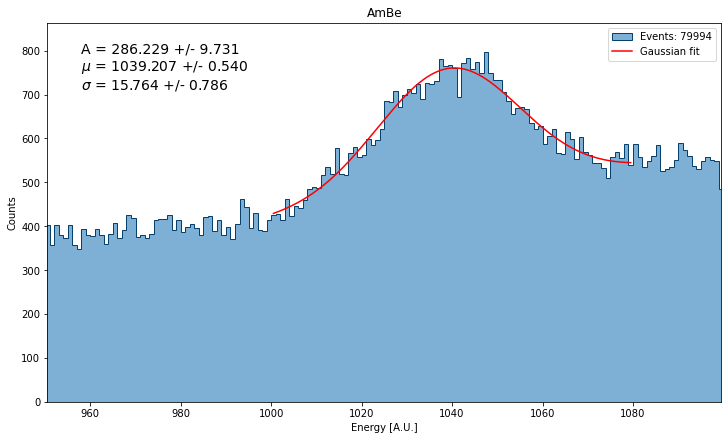

In [161]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = "AmBe"

x, y  = LaBr3_A.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 950
right = 1100
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)

def f(x, a, b, c, d, e):
    return a * np.exp(-(x - b)**2 / (2 * c**2)) + d + e*x

par, err = fit_peak(x=x, y=y, err_y=y_err, func=f, p0=(400, 1040, 20, 0, 0), e_fit=e_fit)

e_fit  = (x > 1000) & (x < 1080)
xgrid = np.linspace(x[e_fit].min(), x[e_fit].max(), 1000)

ax.plot(xgrid, f(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par[[0, 1, 2]], err[[0, 1, 2]])

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.legend()

plt.show()

save_parameters(par[[0, 1, 2]], err[[0, 1, 2]], "labr_a_7Be_3416keV")

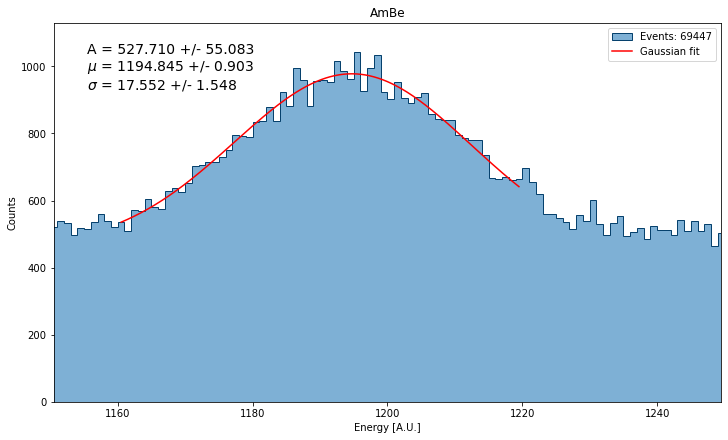

In [151]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = "AmBe"

x, y  = LaBr3_A.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 1150
right = 1250
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)

def f(x, a, b, c, d, e):
    return a * np.exp(-(x - b)**2 / (2 * c**2)) + d + e*x

par, err = fit_peak(x=x, y=y, err_y=y_err, func=f, p0=(100, 1200, 10, 0, 0), e_fit=e_fit)

e_fit  = (x > 1160) & (x < 1220)
xgrid = np.linspace(x[e_fit].min(), x[e_fit].max(), 1000)

ax.plot(xgrid, f(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par[[0, 1, 2]], err[[0, 1, 2]])

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.legend()

plt.show()

save_parameters(par[[0, 1, 2]], err[[0, 1, 2]], "labr_a_7Be_3927keV")

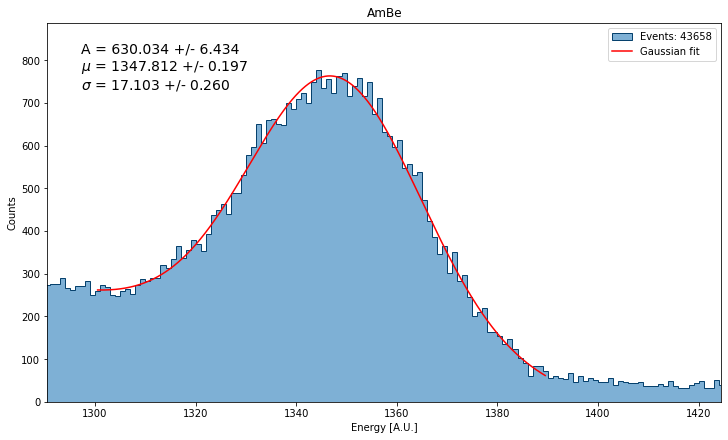

In [136]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = "AmBe"

x, y  = LaBr3_A.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 1290
right = 1425
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)

e_fit  = (x > 1300) & (x < 1390)

ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)

def f(x, a, b, c, d, e):
    return a * np.exp(-(x - b)**2 / (2 * c**2)) + d + e*x

par, err = fit_peak(x=x, y=y, err_y=y_err, func=f, p0=(100, 1370, 5, 0, 0), e_fit=e_fit)

xgrid = np.linspace(x[e_fit].min(), x[e_fit].max(), 1000)

ax.plot(xgrid, f(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par[[0, 1, 2]], err[[0, 1, 2]])

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.legend()

plt.show()

save_parameters(par[[0, 1, 2]], err[[0, 1, 2]], "labr_a_7Be_4438keV")